In [1]:
# Ian Álvarez
# Javier de la Cruz
# % %
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import time # para medir tiempos de ejecución
import random
import math
# gráficos en el notebook
%matplotlib inline

SRATE = 41000


In [2]:

TIME = 1

1.

time: 0.02780914306640625


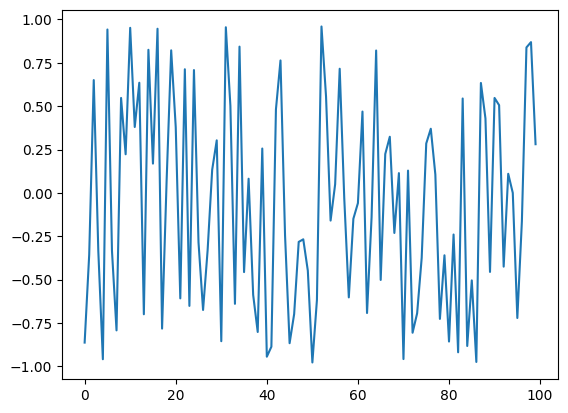

In [3]:
# ESTA ES MÁS RÁPIDA
start = time.time()
noise2 = np.random.uniform(-1,1,SRATE * TIME)
print(f'time: {time.time() - start}')

plt.plot(noise2[:100])

n = noise2*.3

sd.play(n, samplerate=SRATE)
sd.wait()

time: 0.0687417984008789


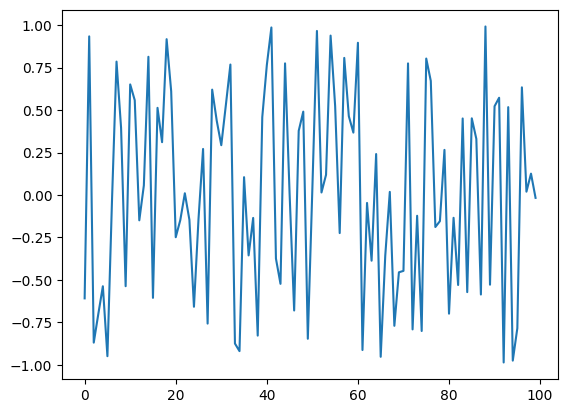

In [4]:
start = time.time()
noise1 = np.empty(SRATE * TIME)
# ESTA ES MÁS LENTA
for i in range(SRATE * TIME):
    noise1[i] = np.random.random() * 2 - 1
print(f'time: {time.time() - start}')


plt.plot(noise1[:100])

n = noise1*0.2

sd.play(n, samplerate=SRATE)

sd.wait()

## seno

In [5]:
SRATE = 41000
TIME = 1
VOL = 1
FREC = 440

2.

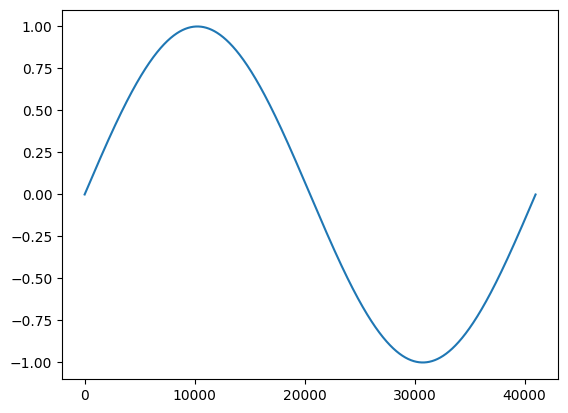

In [6]:
# sen de 1Hz
tiempo = np.empty(SRATE * TIME)
for i in range(len(tiempo)):
    tiempo[i] = np.sin(i * (2 * np.pi / SRATE))

plt.plot(tiempo[:SRATE * TIME])

n = tiempo*0.4

sd.play(n, samplerate=SRATE)
sd.wait()

In [7]:

TIME = 1

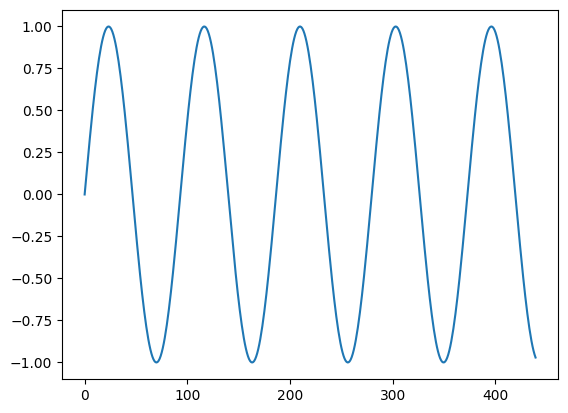

In [8]:
# sen de 1Hz
tiempo = np.empty(SRATE * TIME)
for i in range(len(tiempo)):
    tiempo[i] = np.sin(i * (2 * np.pi / SRATE) * FREC)

plt.plot(tiempo[:int(FREC)])

n = tiempo*VOL

sd.play(n, samplerate=SRATE)
sd.wait()

In [1]:
#kick megachulo
tiempo = np.empty(SRATE * TIME)
for i in range(1, len(tiempo)):
    tiempo[i - 1] = np.sin((len(tiempo) / i) - 1)

plt.plot(tiempo[:SRATE * TIME])

n = tiempo*0.6

sd.play(n, samplerate=SRATE)
sd.wait()

NameError: name 'np' is not defined

In [10]:
def osc(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
    seno = np.empty(samplerate * dur)
    for i in range(len(seno)):
        seno[i] = np.sin(i * (2 * np.pi / samplerate) * freq) + phase
    n = seno*amp
    return n

In [11]:
%%time
do = osc(523, samplerate=SRATE)

TypeError: expected a sequence of integers or a single integer, got '41000.0'

In [12]:
# version optimizada
def osc(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
    tiempo = np.arange(0, dur, 1/samplerate) # array con el tiempo
    seno = amp * np.sin(tiempo * (2 * np.pi * freq) + phase)
    return seno

In [13]:
%%time
do = osc(523, samplerate=SRATE)

CPU times: user 2.39 ms, sys: 0 ns, total: 2.39 ms
Wall time: 2.77 ms


3.

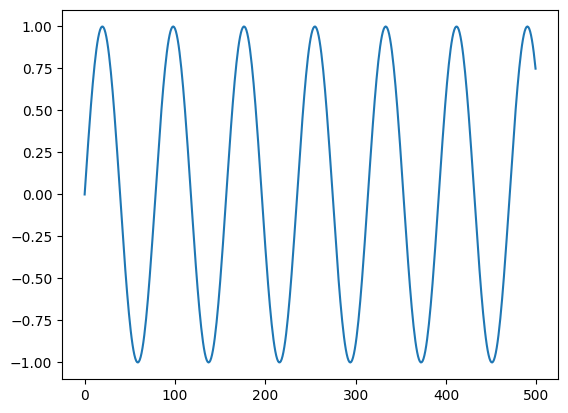

In [14]:
la_t = osc(523, samplerate=SRATE)
plt.plot(la_t[:500])
sd.play(la_t, samplerate=SRATE)
sd.wait()


## notas

In [15]:
'''mapa con las frecuencias de una octava
C D E F G A B c d . . . g
523,251 587,33 659,255 698,456 783,991 880 987,767'''

notas = {
    'C': 523.251,   # do
    'D': 587.33,    # re
    'E': 659.255,   # mi
    'F': 698.456,   # fa
    'G': 783.991,   # sol
    'A': 880,       # la
    'B': 987.767,   # si
    'c': 1046.502,  # do
    'd': 1174.659,  # re
    'e': 1318.51,   # mi
    'f': 1396.913,  # fa
    'g': 1567.982,  # sol
    'a': 1760,      # la
    'b': 1975.533,  # si
}

notas_en_cristiano = {
    'DO': 523.251,
    'RE': 587.33,
    'MI': 659.255,
    'FA': 698.456,
    'SOL': 783.991,
    'LA': 880,
    'SI': 987.767,
    'do': 1046.502,
    're': 1174.659,
    'mi': 1318.51,
    'fa': 1396.913,
    'sol': 1567.982,
    'la': 1760,
    'si': 1975.533,
}

# notas en variables, no las vamos a usar porque es quitar un monton de variables
# C = 523.251
# D = 587.33
# E = 659.255
# F = 698.456
# G = 783.991
# A = 880
# B = 987.767
# c = 1046.502
# d = 1174.659
# e = 1318.51
# f = 1396.913
# g = 1567.982
# a = 1760
# b = 1975.533

In [16]:
octava = "CDEFGABc"
for n in octava:
    nota = osc(notas[n], dur=.3)
    sd.play(nota, samplerate=SRATE)
    sd.wait()

In [17]:
cumpleanyos = "GGAGcBGGAGdcGGgecBAffecdc"
for n in cumpleanyos:
    nota = osc(notas[n], dur=.3)
    sd.play(nota, samplerate=SRATE)
    sd.wait()

In [18]:
def melodia(melodia, bpm=120, samplerate=41000, pausa=0.05):
    negra = 60 / bpm
    seno_melodia = np.empty(0)
    for n,dur in melodia:
        nota = osc(notas[n], dur=dur*negra, samplerate=samplerate)
        seno_melodia = np.concatenate((seno_melodia, nota))
        pause = np.zeros(int(pausa * samplerate))
        seno_melodia = np.concatenate((seno_melodia, pause))
    
    return seno_melodia

4.

(536736,)


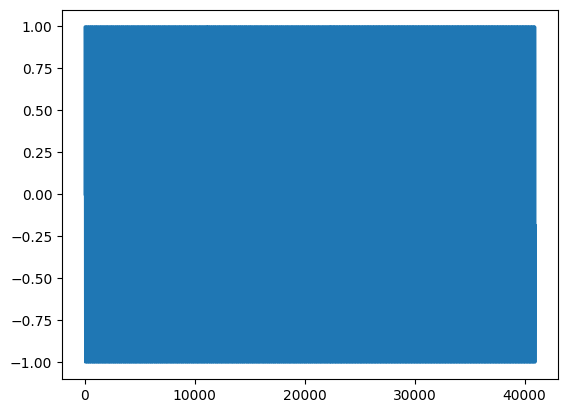

In [19]:
notas_cumple = [
    ('G',0.5),('G',0.5),('A',1),('G',1),
    ('c',1),('B',2),
    ('G',0.5),('G',0.5),('A',1),('G',1),
    ('d',1),('c',2),
    ('G',0.5),('G',0.5),('g',1),('e',1),
    ('c',1),('B',1),('A',1),
    ('f',0.5),('f',0.5),('e',1),('c',1),
    ('d',1),('c',2)
    ]
cumple = melodia(notas_cumple, bpm=110, pausa=0)
print(cumple.shape)
plt.plot(cumple[:SRATE])
sd.play(cumple, samplerate=SRATE)
sd.wait()


5.

In [20]:
def modulator(signal, freq, samplerate=41000):
    mod = (osc(freq, dur=len(signal)/SRATE) + 1) / 2
    # mod = osc(freq, dur=len(signal)/SRATE) # de -1 a 1
    return signal * mod

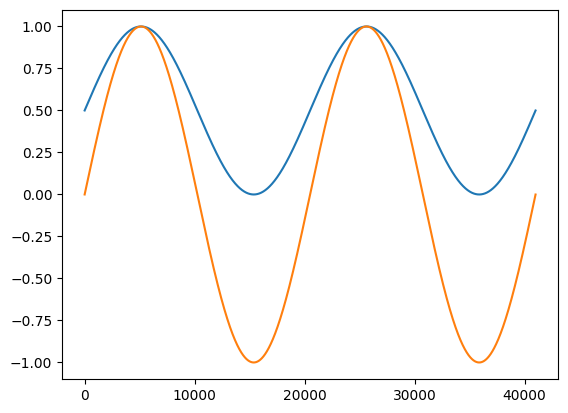

In [21]:
mod = (osc(2, dur=len(osc(880, dur=TIME/SRATE))) + 1) / 2 
mod2 = osc(2, dur=len(osc(880, dur=TIME/SRATE))) #mod2 va de -1 a 1
plt.plot(mod[:SRATE])
plt.plot(mod2[:SRATE])

In [22]:
TIME = 3

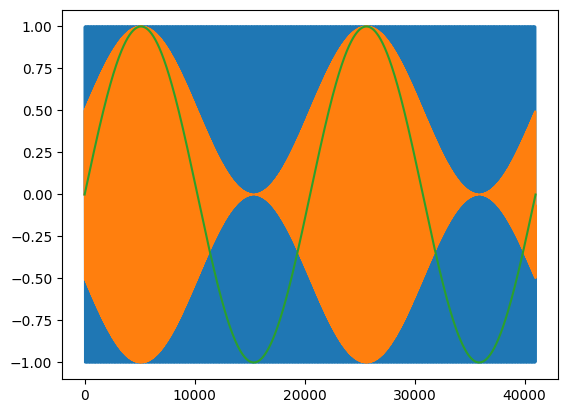

In [23]:
# LA modulado a 2Hz
signal = osc(880, dur=TIME)
mod = modulator(signal, 2) # modular a 2Hz
og = osc(2, dur = TIME)
plt.plot(signal[:SRATE]) # azul
plt.plot(mod[:SRATE]) # naranja
plt.plot(og[:SRATE])

sd.play(mod, samplerate=SRATE)
sd.wait()

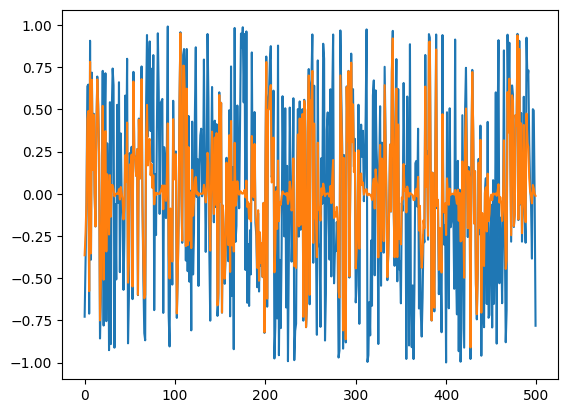

In [24]:
noise = np.random.uniform(-1,1,SRATE * TIME)
mod = modulator(noise, 880) 
plt.plot(noise[:500]) # azul
plt.plot(mod[:500]) # naranja
sd.play(mod, samplerate=SRATE)
sd.wait()

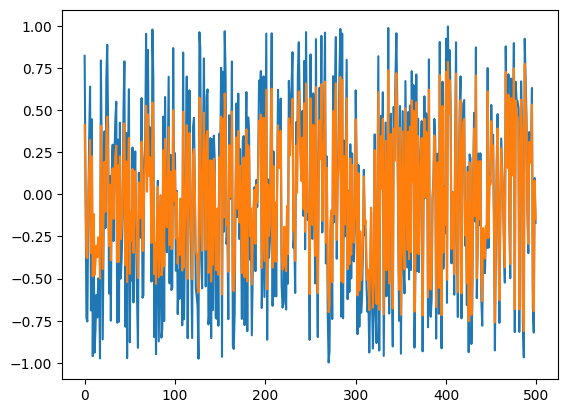

In [25]:
noise = np.random.uniform(-1,1,SRATE * TIME)
mod = modulator(noise, 10) 
plt.plot(noise[:500]) # azul
plt.plot(mod[:500]) # naranja
sd.play(mod, samplerate=SRATE)
sd.wait()

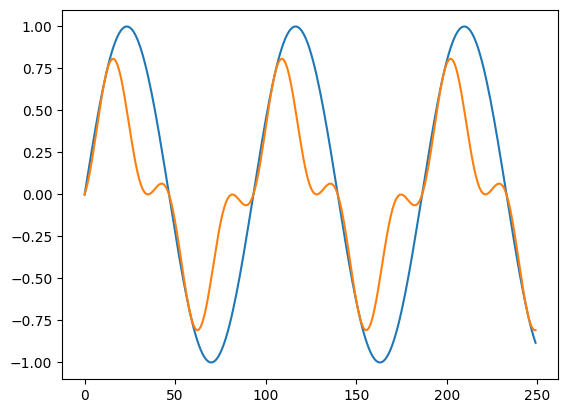

In [26]:
# LA modulado a 2Hz
signal = osc(440, dur=TIME)
mod = modulator(signal, 880) # modular a 2Hz
plt.plot(signal[:250]) # azul
plt.plot(mod[:250]) # naranja

sd.play(mod, samplerate=SRATE)
sd.wait()

Si dejamos que el modulador oscile entre -1 y 1, entonces modula al doble de la frecuencia dada.
Además en los intervalos negativos, la onda se invierte.


6.

In [27]:
def harmOsc(freq, amps, dur, amp=1.0, samplerate=41000, norm=False):
    n = len(amps)
    harm = np.zeros(samplerate * dur)
    for i in range(n):
        harm += osc(freq * (i + 1), dur, amps[i], samplerate=samplerate)
        if norm:
            harm = harm / np.max(harm)
    return harm * amp   

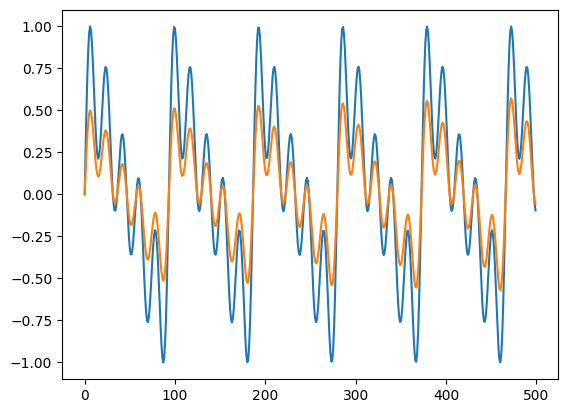

In [28]:
la_t = harmOsc(440, [1, 0.5, 0.2, 0.2, 0.5], 3, norm=True)
plt.plot(la_t[:500])
sd.play(la_t, samplerate=SRATE)
sd.wait()

la_t = modulator(la_t, 2)
plt.plot(la_t[:500])
sd.play(la_t, samplerate=SRATE)
sd.wait()

[0.34481502 0.4418447  0.59601854]
[0.60972535 0.96942681 0.08825599]
[0.37624689 0.88842934 0.82955563]
[0.64336884 0.12730244 0.41260285]
[0.13750327 0.68472645 0.68562989]


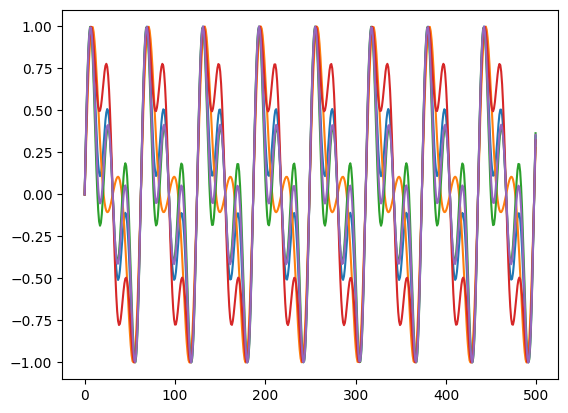

In [29]:
# generador de armonicos aleatorios
freq = notas_en_cristiano['MI']
n = 3
for i in range(5):
    amps = np.random.uniform(0,1,n)
    print(amps)
    harm = harmOsc(freq, amps, 1, amp=1, norm=True)
    plt.plot(harm[:500])
    sd.play(harm, samplerate=SRATE)
    sd.wait()

[1, 0, 0.3333333333333333, 0, 0.2, 0, 0.14285714285714285, 0, 0.1111111111111111, 0, 0.09090909090909091]


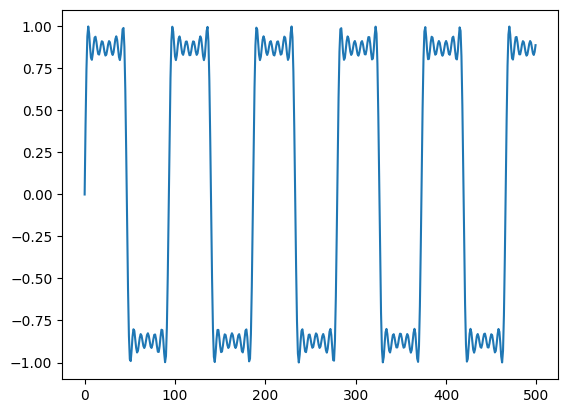

In [30]:
# arm = [1*random.random(), 0, 1/3 * random.random(), 0, 1/5 * random.random(), 0, 1/7 *random.random(), 0, 1/9*random.random(), 0, 1/11*random.random()]
arm = [1, 0, 1/3, 0, 1/5, 0, 1/7, 0, 1/9, 0, 1/11]
# arm = [1, 2/2, 1/3, 2/4, 1/5, 2/6, 1/7, 2/8, 1/9, 2/10, 1/11]
la_t = harmOsc(440, arm, 3, norm=True)
print(arm)
plt.plot(la_t[:500])
sd.play(la_t, samplerate=SRATE)
sd.wait()

no hemos enocontrado ningun instrumento que suene a alguno de las frecuencias y amplitudes que hemos probado, este último se supone que es un clarinete pero no se parece demasiado...

In [31]:

# def osc(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
#     tiempo = np.arange(0, dur, 1/samplerate) # array con el tiempo
#     onda = amp * np.sin(tiempo * (2 * np.pi * freq) + phase)
#     return onda

def sine(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
    return osc(freq, dur=dur, amp=amp, phase=phase, samplerate=samplerate)

def square(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000, duty=0.5):
    tiempo = np.arange(0, dur, 1/samplerate) # array con el tiempo
    onda = np.where((tiempo - phase) * freq % 1 < duty, amp, -amp)
    return onda

def triangle(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
    tiempo = np.arange(0, dur, 1/samplerate) # array con el tiempo
    onda = (2 * amp / np.pi) * np.arcsin(np.sin(tiempo * (2 * np.pi * freq) + phase))
    return onda

def sawtooth(freq,dur=1.0,amp=1.0,phase=0.0,samplerate=41000):
    tiempo = np.arange(0, dur, 1/samplerate) # array con el tiempo
    onda = (2 * amp / np.pi) * np.arctan(np.tan(tiempo * (1 * np.pi * freq) + phase)) 
    # si pongo 2 * np.pi...,(como dice wikipedia) creo que sale al doble de frecuencia de lo que debería
    return onda

def harmOsc(freq, amps, dur, amp=1.0, phase= 0.0, samplerate=41000, norm=False, onda=sine):
    n = len(amps)
    harm = np.zeros(int(samplerate * dur))
    for i in range(n):
        harm += onda(freq * (i + 1), dur, amps[i], samplerate=samplerate, phase=phase)
        if norm:
            harm = harm / np.max(harm)
    return harm * amp   

KeyboardInterrupt: 

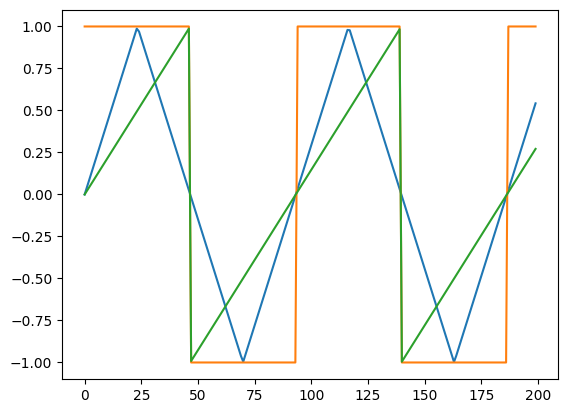

In [32]:
arm = [1, 0, 1/3, 0, 1/5, 0, 1/7, 0, 1/9, 0, 1/11]
la_t = harmOsc(440, [1], 2, norm=False, onda=triangle)
la_c = harmOsc(440, [1], 2, norm=False, onda=square)
la_s = harmOsc(440, [1], 2, norm=False, onda=sawtooth)
plt.plot(la_t[:200])
plt.plot(la_c[:200])
plt.plot(la_s[:200])
sd.play(la_t, samplerate=SRATE)
sd.wait()
sd.play(la_c, samplerate=SRATE)
sd.wait()
sd.play(la_s, samplerate=SRATE)
sd.wait()

In [44]:
def melodia(melodia, bpm=120, samplerate=41000, pausa=0.05):
    negra = 60 / bpm
    seno_melodia = np.empty(0)
    for n,dur in melodia:
        nota = osc(notas[n], dur=dur*negra, samplerate=samplerate)
        seno_melodia = np.concatenate((seno_melodia, nota))
        pause = np.zeros(int(pausa * samplerate))
        seno_melodia = np.concatenate((seno_melodia, pause))
    
    return seno_melodia

def melodia_con_armonia(melodia, bpm=120, pausa=0.0, arms=[1], amp = 1.0, onda=sine, synt = harmOsc, samplerate=41000):
    negra = 60 / bpm
    onda_melodia = np.empty(0)
    tiempo = 0
    pause = np.zeros(int(pausa * samplerate))
    last_phase = 0
    for n,dur in melodia:
        tiempo += dur
        nota = harmOsc(notas[n], arms, dur*negra, amp, phase=last_phase, samplerate=samplerate, norm=True, onda=onda)
        onda_melodia = np.concatenate((onda_melodia, nota))
        if onda_melodia[len(onda_melodia)-1] > onda_melodia[len(onda_melodia)-2]: # si sube
            last_phase = math.asin(onda_melodia[len(onda_melodia)-1]/amp) - 2*tiempo*np.pi * notas[n]
        else: #si baja
            last_phase = math.asin(onda_melodia[len(onda_melodia)-1]/amp) - 2*tiempo*np.pi * notas[n] +np.pi
        onda_melodia = np.concatenate((onda_melodia, pause))
    return onda_melodia

In [45]:
def play_song(melodia, bpm=120, pausa=0.0, arms=[1], amp = 1.0, onda=sine, synt = harmOsc, samplerate=41000):
    negra = 60 / bpm
    seno_melodia = np.empty(0)
    timepo = 0
    sd.play([0])
    for n,dur in melodia:
        tiempo += dur
        nota = synt(notas[n], arms, dur, amp, phase=tiempo, samplerate=samplerate, norm=True, shape=onda)
        sd.wait()
        sd.play(nota, samplerate=samplerate)
    sd.wait()

In [46]:
notas_cumple = [
    ('G',0.5),('G',0.5),('A',1),('G',1),
    ('c',1),('B',2),
    ('G',0.5),('G',0.5),('A',1),('G',1),
    ('d',1),('c',2),
    ('G',0.5),('G',0.5),('g',1),('e',1),
    ('c',1),('B',1),('A',1),
    ('f',0.5),('f',0.5),('e',1),('c',1),
    ('d',1),('c',2)
    ]

notas = {
    'C': 523.251,   # do
    'D': 587.33,    # re
    'E': 659.255,   # mi
    'F': 698.456,   # fa
    'G': 783.991,   # sol
    'A': 880,       # la
    'B': 987.767,   # si
    'c': 1046.502,  # do
    'd': 1174.659,  # re
    'e': 1318.51,   # mi
    'f': 1396.913,  # fa
    'g': 1567.982,  # sol
    'a': 1760,      # la
    'b': 1975.533,  # si
}

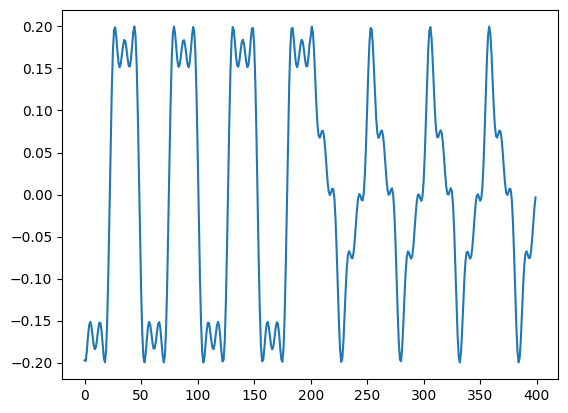

In [47]:
m = melodia_con_armonia(notas_cumple, amp=0.2, onda=sine, bpm=300, arms=[1,0,1/3,0,1/5])
plt.plot(m[3900:4300])
sd.play(m)
sd.wait()
